### Feed forward neural network from scratch 

Exemple de code général pour des couches cachés relu et une couche de sortie sigmoid/softmax pour de la classification.

Rappel sigmoid, softmax, relu : 

Sigmoid : $\phi(z_i) = \frac{1}{1+e^{-z_i}} \text{   ,   }  \phi'(z_i) = \frac{e^{-z_i}}{(1+e^{-zi})^2}$

Softmax : $\phi(z_i) = \frac{e^{-z_i}}{1+\sum_{j}^{n}e^{-z_j}} \text{   ,   }  \frac{\partial \phi(z_i)}{\partial z_j} = \begin{cases} \phi(z_i) (1-\phi(z_i)) \text{ si i = j }\\ -\phi(z_i) \phi(z_j) \text{ sinon } \end{cases}$

Relu : $\phi(z_i) = max(z_i,0)  \text{   ,   } \phi'(z_i) = \mathbb{1}_{\{z_i > 0\}}$

In [5]:
!pip install -r requirements.txt

In [49]:
from src.EasyNN import FeedForwardNeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

In [44]:
x_train = np.array([[0,1,2],[2,5,0],[4,8,2]])
y_train = np.array([0,1,1])

#init the model
model = (FeedForwardNeuralNetwork(X = x_train, y = y_train, loss = 'binary_cross_entropy',
        learning_rate = 0.01, epoch = 10))

#add your layers
model.add_hidden_layer(layer_rank=1, neurons = 64, activation = 'relu')
model.add_hidden_layer(layer_rank=2, neurons = 12, activation = 'relu')
model.add_output_layer(neurons = 1, activation = 'sigmoid')

#train the model and get the mean loss per epoch
loss = model.train()

#predict (prob)
y_test = np.array([1])
x_test = np.array([[4,8,3]])
x_test = pd.DataFrame(x_test)

pred_prob = model.predict_prob(x_test)

#save the model and re-train it
model.save_param(model_name = 'model_example')  #create a pkl file 'model_example.pkl'

Accuracy on epoch 1 :  0.3333333333333333
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 1:  1.0406121922794986
Accuracy on epoch 2 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 2:  0.2634642661052953
Accuracy on epoch 3 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 3:  0.17259058516123563
Accuracy on epoch 4 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 4:  0.12571969393774587
Accuracy on epoch 5 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 5:  0.09850641301685781
Accuracy on epoch 6 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 6:  0.08070311771565948
Accuracy on epoch 7 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 7:  0.06824306407065979
Accuracy on epoch 8 :  1.0
Loss <function binary_cross_entropy at 0x7fa557338cc0> on epoch 8:  0.05894539061164491
Accuracy on epoch 9 :  1.0
Loss <function binary_cross_entropy at 0

In [45]:
with open('model_example.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [51]:
model.pre_train(loaded_model)

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [28]:
#Example with MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

X = X / 255.0 #Must normalize pixels

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# one hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))


x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train_onehot)

#For accuracy score
y_test_labels = y_test.astype(int)

In [30]:
model = FeedForwardNeuralNetwork(x_train,y_train,"cross_entropy",0.001,10)

model.add_hidden_layer(1,254,"relu")
model.add_hidden_layer(2,128,"relu")
model.add_hidden_layer(3,64,"relu")
model.add_output_layer(10,"softmax")

loss = model.train()

Accuracy on epoch 1 :  0.8922321428571428
Loss <function cross_entropy at 0x7fa557338f40> on epoch 1:  0.3593180654247642
Accuracy on epoch 2 :  0.9486071428571429
Loss <function cross_entropy at 0x7fa557338f40> on epoch 2:  0.166600766362512
Accuracy on epoch 3 :  0.9644821428571428
Loss <function cross_entropy at 0x7fa557338f40> on epoch 3:  0.11804987406634532
Accuracy on epoch 4 :  0.9713214285714286
Loss <function cross_entropy at 0x7fa557338f40> on epoch 4:  0.09118731358611437
Accuracy on epoch 5 :  0.9771964285714285
Loss <function cross_entropy at 0x7fa557338f40> on epoch 5:  0.07366294036106272
Accuracy on epoch 6 :  0.9815
Loss <function cross_entropy at 0x7fa557338f40> on epoch 6:  0.0597767097967131
Accuracy on epoch 7 :  0.9849642857142857
Loss <function cross_entropy at 0x7fa557338f40> on epoch 7:  0.049415302550271885
Accuracy on epoch 8 :  0.9870357142857142
Loss <function cross_entropy at 0x7fa557338f40> on epoch 8:  0.041349654754343566
Accuracy on epoch 9 :  0.98955

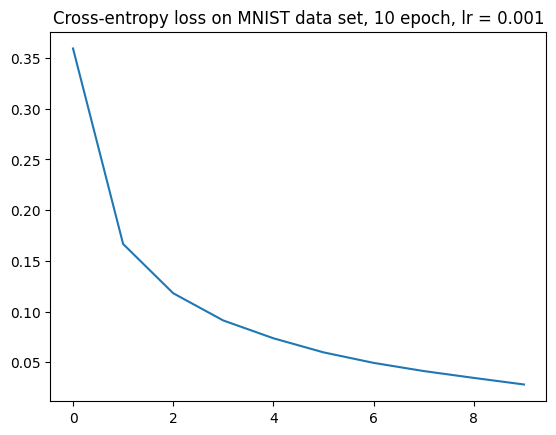

In [31]:
plt.figure()
plt.plot([i for i in range(len(loss))], loss)
plt.title("Cross-entropy loss on MNIST data set, 10 epoch, lr = 0.001")
plt.show()

In [33]:
#Accuracy on test set

pred_prob = model.predict_prob(x_test)
pred = np.array([np.argmax(p, axis=0)[0] for p in pred_prob])

accuracy = accuracy_score(y_test_labels, pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9742142857142857


In [34]:
#save the model
model.save_param("mnist_ffnn")

Weights properly saved as mnist_ffnn.pkl


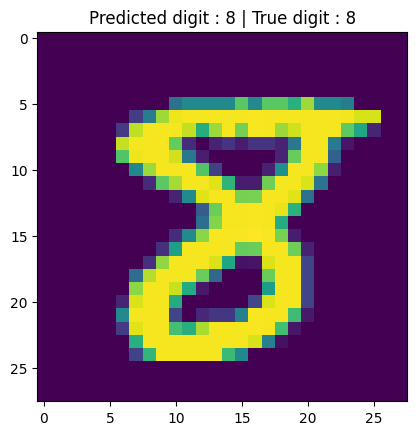

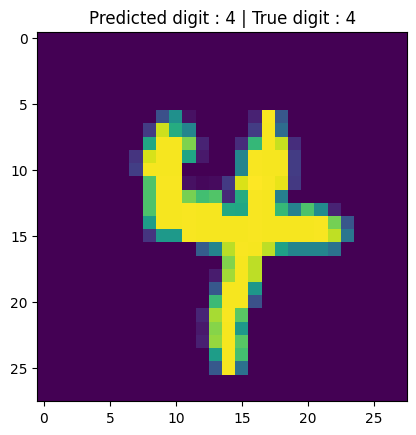

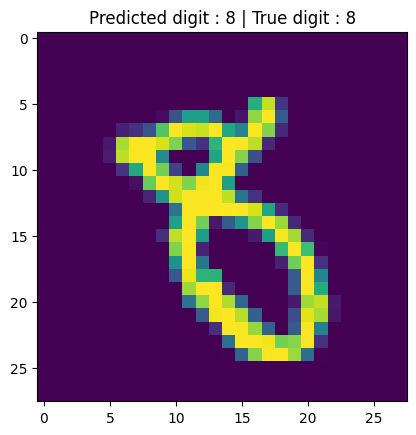

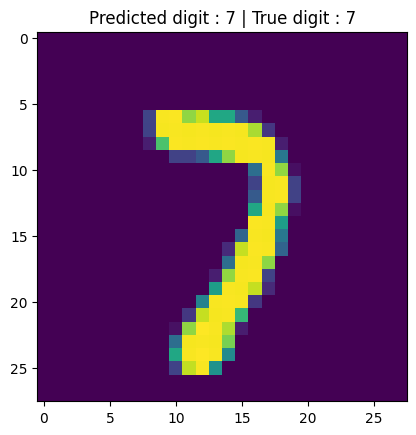

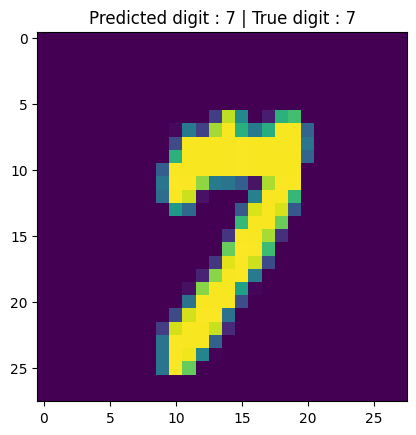

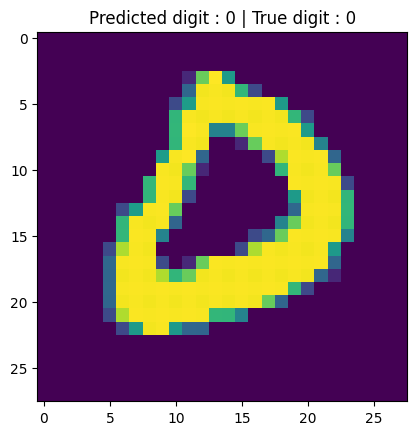

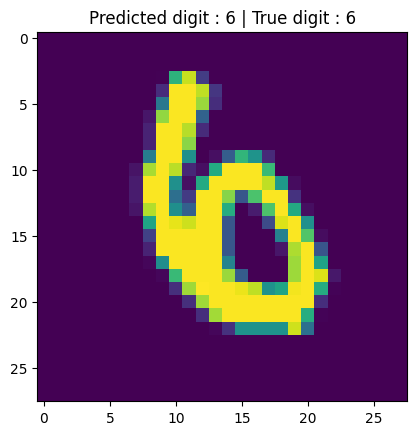

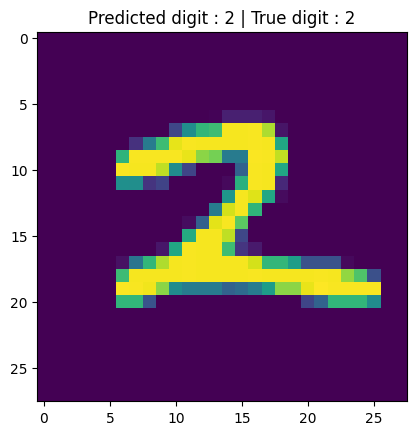

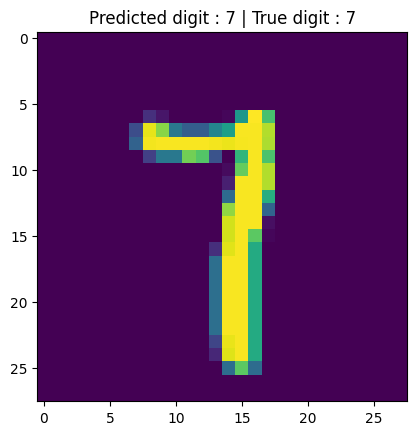

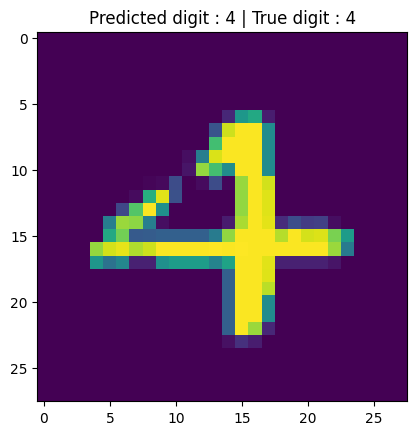

In [38]:
#Some examples
for i in range(10):
    plt.figure()
    im_true = x_test.iloc[i,:].to_numpy().reshape(28,28)
    im_pred = pred[i]
    true_digit = y_test_labels[i]

    plt.imshow(im_true)
    plt.title(f"Predicted digit : {im_pred} | True digit : {true_digit}")